## Python Notebook for SSI2017 Summer School

This notebook is meant to illustrate how the primary CMB anisotropies are dependent on cosmolocigal parameters

Dependencies:
numpy
matplotlib
pycamb

In [12]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower

Populating the interactive namespace from numpy and matplotlib


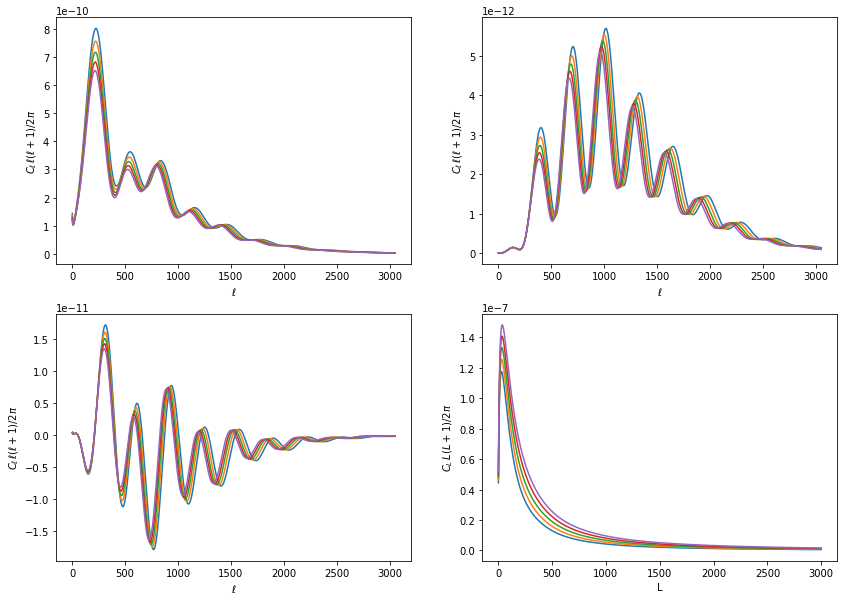

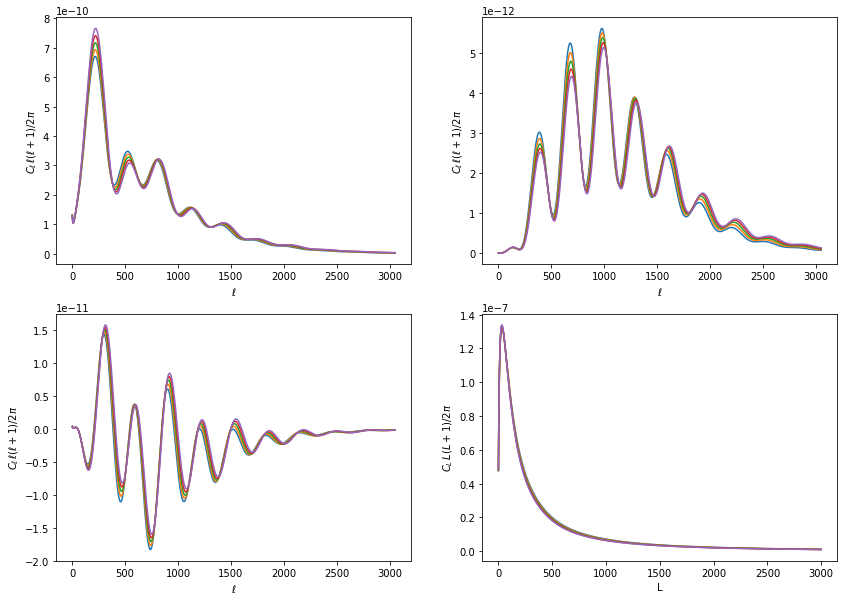

In [57]:
def cmb_par_dependence(ellmax,outfile,param='om'):
    ranges = np.array(1. + 0.1*np.arange(-2,3,1)) # +/- 20%
    
    if (param == 'om'):
        omh2 = np.array(0.122 * ranges)
    elif (param == 'ob'):
        obh2 = np.array(0.022 * ranges)    
    else:
        return "not a valid parameter option"

    xlab = [r"$\ell$",r"$\ell$",r"$\ell$",r"L"]
    ylab = [r"$C_\ell\,\ell(\ell + 1)/2\pi$",r"$C_\ell\,\ell(\ell + 1)/2\pi$",r"$C_\ell\,\ell(\ell + 1)/2\pi$",r"$C_L\,L(L + 1)/2\pi$"]
    figure(figsize=(14,10))
        
    for jj in xrange(len(ranges)):
        if (param == 'om'):
            pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=omh2[jj], mnu=0.06, omk=0, tau=0.06)
        elif (param == 'ob'):
            pars.set_cosmology(H0=67.5, ombh2=obh2[jj], omch2=0.122, mnu=0.06, omk=0, tau=0.06)
        
        pars.InitPower.set_params(ns=0.965, r=0)    
        pars.set_for_lmax(ellmax, lens_potential_accuracy=1);
        #calculate results for these parameters
        results = camb.get_results(pars)
        powers = results.get_cmb_power_spectra(pars)
        totCL  = powers['total']
        lensCL = results.get_lens_potential_cls(lmax=ellmax)
        ls = np.arange(totCL.shape[0])
        ls_lens = np.arange(lensCL.shape[0])
        
        for ii in xrange(4):
            plt.subplot(2,2,ii+1)
            plt.xlabel(xlab[ii])
            plt.ylabel(ylab[ii])
            if (ii < 2): 
                plt.plot(ls[2:],totCL[2:,ii])
            elif(ii == 2):
                plt.plot(ls[2:],totCL[2:,ii+1])
            else:
                plt.plot(ls_lens[2:],lensCL[2:,0])
 
    return

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(ns=0.965, r=0)
pars.set_for_lmax(3000, lens_potential_accuracy=1);
#calculate results for these parameters
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars)

#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).

totCL=powers['total']
ls = np.arange(totCL.shape[0])

#plt.plot(ls,totCL[:,0], color='k')
#plt.plot(ls,totCL[:,1], color='k')

#plt.subplot(1,3,1)
#plt.plot(ls,totCL[:,0], color='k')
#plt.subplot(1,3,2)
#plt.plot(ls,totCL[:,1], color='k')
#plt.subplot(1,3,3)
#plt.plot(ls,totCL[:,3], color='k')


cmb_par_dependence(3000,'blah',param='om') 
cmb_par_dependence(3000,'blah',param='ob') 